#### Multilinear Regression
Assumptions in Multinear Regression
- Linear: The rellation between the predictors and the response is linear.
- Independece: Observations are independent of each other.
- Homosecedasticity: The residuals(differences between observed and preicted values) exhibit constant variance at all levels of the predictor.
- Normal Distribution of Errors: The residuals of the model are normaally distributed.
- No multicollinearity: The independent variables should not be too highly correlated with each other.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [3]:
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
cars = pd.DataFrame(cars, columns=["HP","VOL","SP","WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


#### Desription of columns
- MPG : Milege of the car
- HP : Horse power of the car
- VOL : Volume of the car(size)
- SP : Top speed of the car(Miles per Hour)
- WT : Weight of the car(pounds)

#### EDA

In [5]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [6]:
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

#### Observatiions
- There are no missing values
- There are 81 observations
- The data types of the columns are relevent and valid

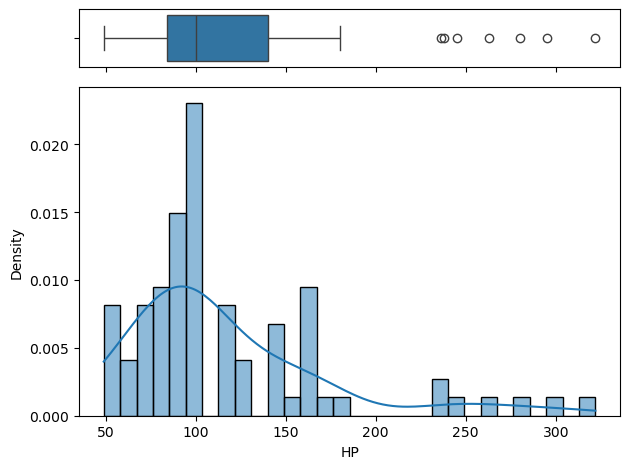

In [7]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15,.85)})
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()


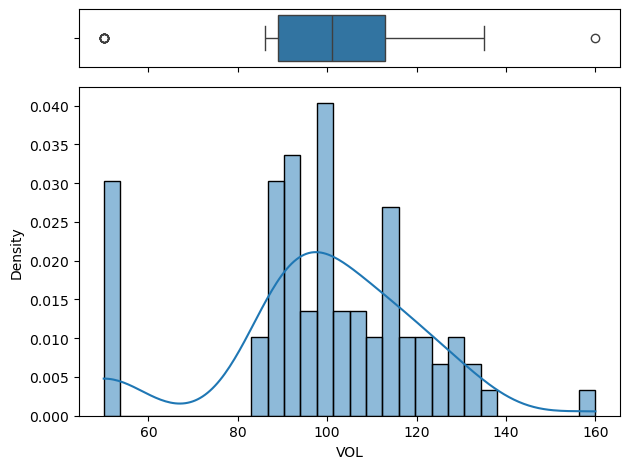

In [8]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15,.85)})
sns.boxplot(data=cars, x='VOL', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='VOL', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()


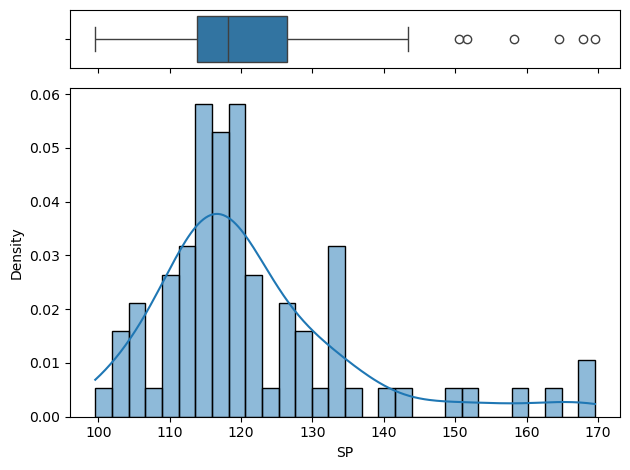

In [9]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15,.85)})
sns.boxplot(data=cars, x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='SP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()


#### Observations from boxplot and histogra
- There are some extreme values(outliers) observed in towards the right tail of SP andd HP didtributions.
- In VOL and WT columns, a few outliers are observed in both tails of their distributions.
- The extreme values of cars data may have comw from the specially designed nature of cars.
- As this is multi-dimensional data, the outliers with respect to spatial dimensions may have to be considered while building the regression model.

#### Checking for duplication rows

In [ ]:
cars[cars.duplicated()]

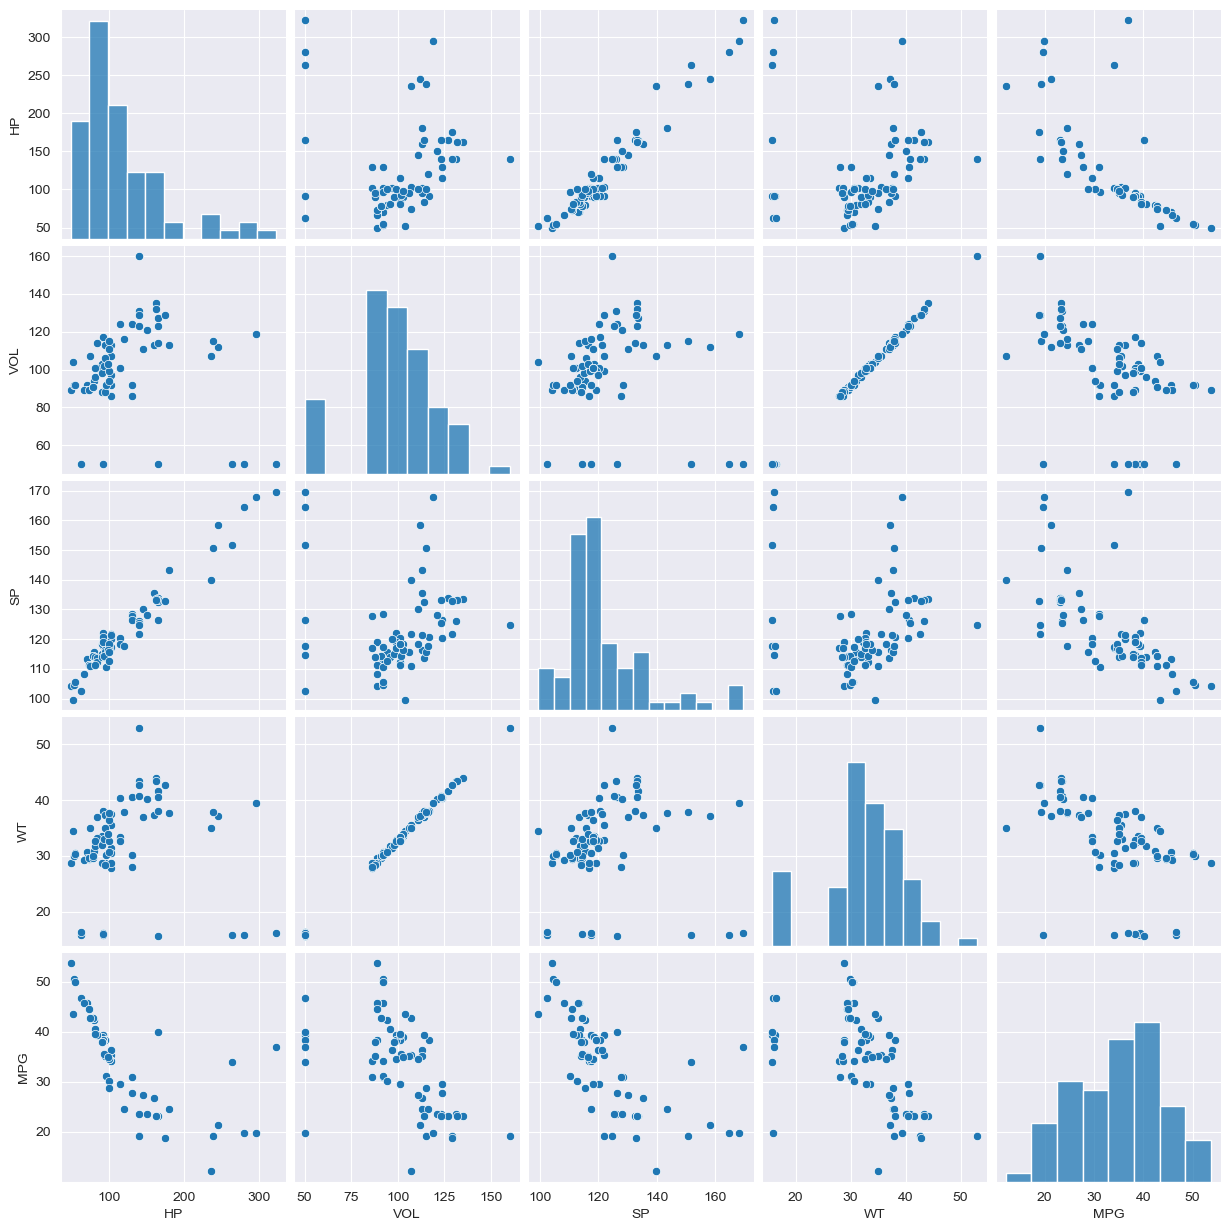

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [11]:
cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


#### Observations
- Relation between linear and non linear variables
- Strength and direction of correlation
- Between x and y, all the variables are showing  moderate to high correlation strengths, highest being between HP and  MPG
- Among x columns (x1,x2,x3 and x4), some very high correlation srength are observed between SP vs HP,VOL vs WT
- The high correlation among x columns is not desirable as it might lead to multicollinearity problem

##### Prepare a preliminary model cnsidering all columns

In [12]:
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        11:29:34   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observations from model summary
- The R-squared and adjusted R-squared values are good and about 75% of variability in Y is explained by X columns
- Yhe prbability value with respect to F-statistic is close to zero, indicating that all or some of X columns are significant
- The p-values for VOL and WT are height that 5% indicationg some interaction issues among themselves, which need to be further explored

#### Performance metrics for model

In [13]:
df1 = pd.DataFrame()
df1["actual_y1"] = cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [14]:
pred_y1 = model.predict(cars.iloc[:,0:4])
df1["pred_y1"] = pred_y1
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(df1["actual_y1"], df1["pred_y1"])
print("MSE :", mse)
print("RMSE :", np.sqrt(mse))


MSE : 18.897141152343096
RMSE : 4.347084212704315


#### Checking for multicollinearrity among X-columns using VIF method

In [16]:
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [17]:
# Compute VIF values
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) 


d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


#### Observations:
- The ideal range of VIF values shall be between 0 to 10 .However slightly higher values can be tolerated
- As seen from the very high VIF values for VOL and Wt.it is clear that they are prone to multicollinearity problem
- Hence it is decided to declare to drop one of the columns(either VOL or WT) to overcome the multicollinearity
- it is decided to drop WT and retain VOL column in furtther models

In [18]:
cars1 = cars.drop("WT", axis=1)
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [19]:
import statsmodels.formula.api as smf
model2 = smf.ols('MPG~VOL+SP+HP',data=cars1).fit()

In [20]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.56e-24
Time:                        11:30:36   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Performance metrics for model2

In [21]:
df2 = pd.DataFrame()
df2["actual_y2"] = cars["MPG"]
df2.head()

,actual_y2
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [22]:
pred_y2 = model2.predict(cars1.iloc[:,0:4])
df2["pred_y2"] = pred_y2
df2.head()

,actual_y2,pred_y2
0,53.700681,43.590769
1,50.013401,42.256794
2,50.013401,42.256794
3,45.696322,42.361497
4,50.504232,42.269544


In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(df2["actual_y2"], df2["pred_y2"])
print("MSE :", mse)
print("RMSE :", np.sqrt(mse))


MSE : 18.911053388711217
RMSE : 4.348684098518909


#### Observations from model2 summary()
- The adjusted R-squared value improved slightly to 0.76
- All the p-values for model parameters are less than 5% hence they are significant
- Therefore the HP,VOL,SP columns are finalized as the significant predictor for the MPG
- there is no improvement in MSE value

#### Identification of High influence points (spatial outliers)

In [24]:
cars1.shape

(81, 4)

In [25]:
k = 3
n = 81
leverage_cutoff = 3*((k + 1) / n)
leverage_cutoff

0.14814814814814814

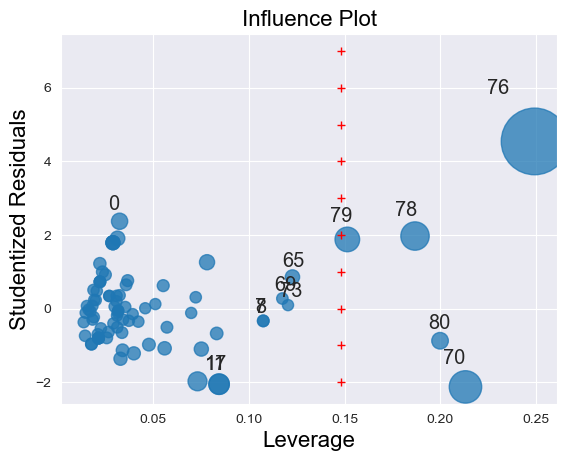

In [26]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2,alpha=.05)
y = [i for i in range(-2,8)]
x = [leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

#### Observations
- From the above plot, it is evident thet data points 65,70,76,78,79,80 are the influencers.
- as their H Leverage values are higher and size is higher
  

In [27]:
cars2=cars1.drop(cars1.index[[65,70,76,78,79,80]],axis=0).reset_index(drop=True)

In [28]:
cars2

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
...,...,...,...,...
70,162,132,133.140074,23.203569
71,140,160,124.715241,19.086341
72,140,129,121.864163,19.086341
73,175,129,132.864163,18.762837


#### Bulid Model3 on cars2 dataset

In [29]:
model3 = smf.ols('MPG~VOL+SP+HP',data = cars2).fit()

#### Performance Metrics for model3

In [30]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     182.7
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           2.60e-33
Time:                        11:31:49   Log-Likelihood:                -187.46
No. Observations:                  75   AIC:                             382.9
Df Residuals:                      71   BIC:                             392.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6816     11.600      0.404      0.688     -18.448      27.811
VOL           -0.0952      0.021     -4.451      0.000      -0.138      -0.053
SP             0.6342      0.124      5.134      0.000       0.388       0.881
HP            -0.3350      0.034     -9.937      0.000      -0.402      -0.268
==============================================================================
Omnibus:                       20.724   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.198
Skew:                           1.233   Prob(JB):                     1.24e-06
Kurtosis:                       4.619   Cond. No.                     6.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
df3 = pd.DataFrame()
df3["actual_y3"] = cars2["MPG"]
df3.head()

,actual_y3
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [32]:
pred_y3 = model3.predict(cars2.iloc[:,0:3])
df3["pred_y3"] = pred_y3
df3.head()

,actual_y3,pred_y3
0,53.700681,45.872002
1,50.013401,44.385430
2,50.013401,44.385430
3,45.696322,44.433742
4,50.504232,44.421272


In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df3["actual_y3"], df3["pred_y3"])
print("MSE :", mse)
print("RMSE :", np.sqrt(mse))

MSE : 8.681197361563031
RMSE : 2.946387171022001


#### Comparison of models
                     

| Metric         | Model 1 | Model 2 | Model 3 |
|----------------|---------|---------|---------|
| R-squared      | 0.771   | 0.770   | 0.885   |
| Adj. R-squared | 0.758   | 0.761   | 0.880   |
| MSE            | 18.89   | 18.91   | 8.68    |
| RMSE           | 4.34    | 4.34    | 2.94    |


- **From the above comparison table it is observed that model3 is the best among all with superior performance metrics**

#### Check the validity of model assumptions for model3

In [34]:
model3.resid

0     7.828680
1     5.627971
2     5.627971
3     1.262580
4     6.082960
        ...   
70    0.919969
71   -2.559623
72   -3.702073
73    0.724230
74    9.700384
Length: 75, dtype: float64

In [35]:
model3.fittedvalues

0     45.872002
1     44.385430
2     44.385430
3     44.433742
4     44.421272
        ...    
70    22.283600
71    21.645963
72    22.788414
73    18.038607
74     9.497504
Length: 75, dtype: float64

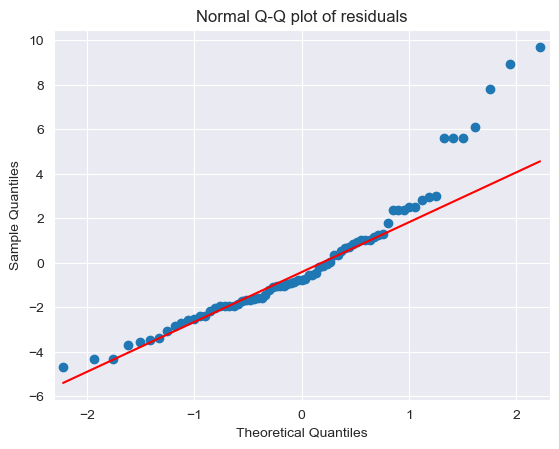

In [36]:
# The model is built with VOL, SP, HP by ignoring WT
import statsmodels.api as sm
qqplot=sm.qqplot(model3.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

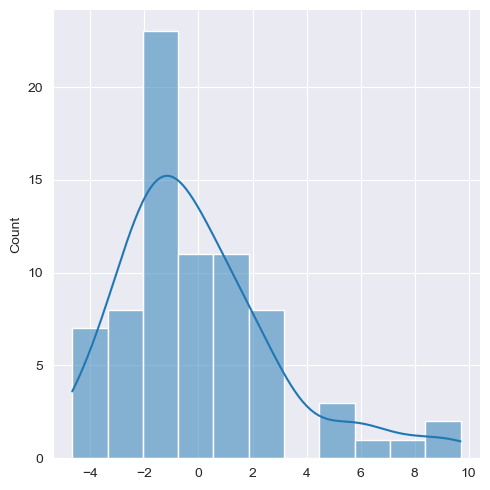

In [37]:
sns.displot(model3.resid,kde = True)

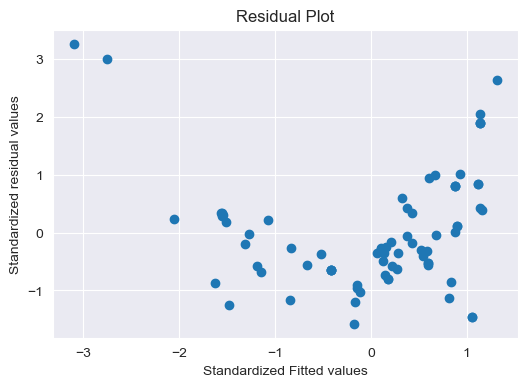

In [38]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.figure(figsize=(6,4))
plt.scatter(get_standardized_values(model3.fittedvalues),
            get_standardized_values(model3.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()
